<a href="https://colab.research.google.com/github/AllanApiny/Carlifonia-Housing-Price-Prediction-Using-Ridge-Regression/blob/main/Housing_Price_Prediction_using_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
#Import neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


In [3]:
#upload the file
df=pd.read_csv('housing.csv')

In [4]:
#inspect the dataframe
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#percentage missing values
df.isnull().sum()/len(df)*100

,0
longitude,0.000000
latitude,0.000000
housing_median_age,0.000000
total_rooms,0.000000
total_bedrooms,1.002907
population,0.000000
households,0.000000
median_income,0.000000
median_house_value,0.000000
ocean_proximity,0.000000


In [7]:
#drop missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
#check for outliers
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


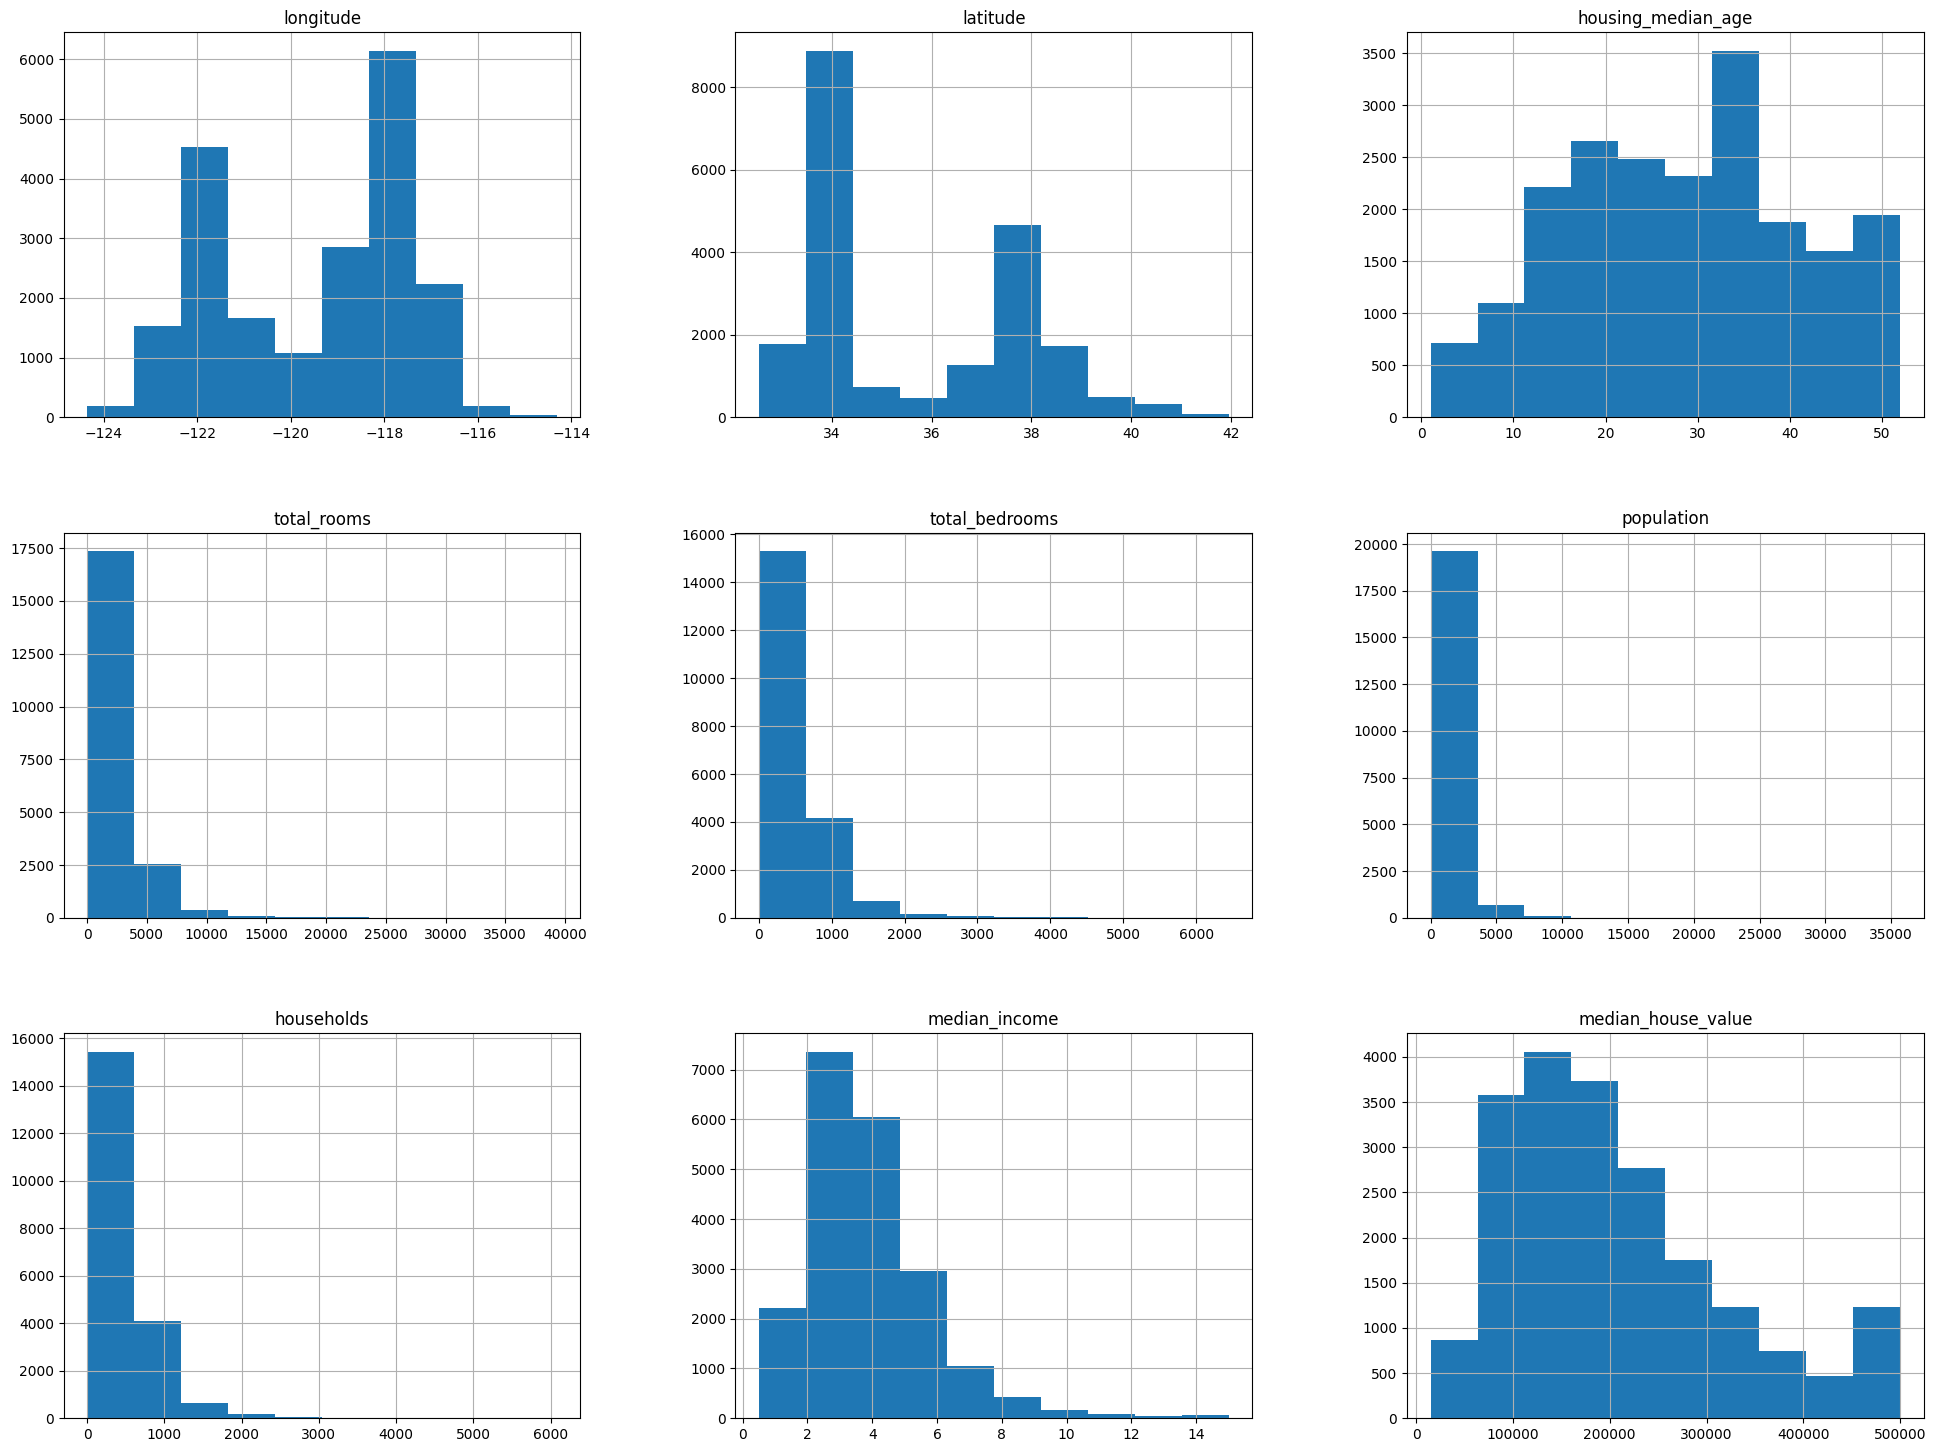

In [9]:
df.hist(figsize=(24,18));

In [10]:
#remove outliers in population
Q1=df.population.quantile(0.25)
Q3=df.population.quantile(0.75)
IQR=Q3-Q1
lower_bound=max(0,Q1-1.5*IQR)
upper_bound=Q3+1.5*IQR
print('lower bound =',lower_bound)
print('upper bound =',upper_bound)

lower bound = 0
upper bound = 3124.5


In [11]:
outliers=(df.population<=lower_bound)|(df.population>=upper_bound)
df=df[~outliers]

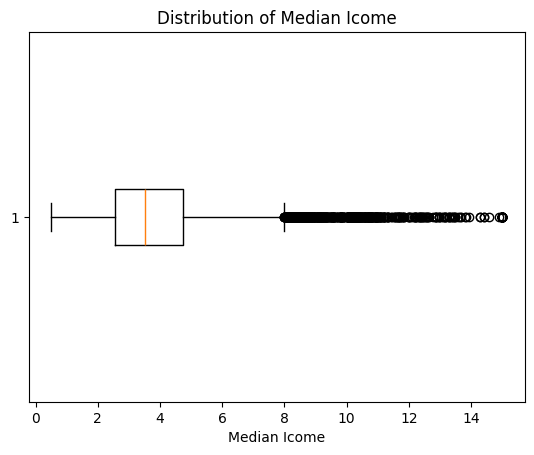

In [12]:
#outliers in median income
plt.boxplot(df.median_income,vert=False)
plt.title('Distribution of Median Icome')
plt.xlabel('Median Icome')
plt.show()

In [13]:
#remove outliers in median_income
Q1=df.median_income.quantile(0.25)
Q3=df.median_income.quantile(0.75)
IQR=Q3-Q1
lower_bound=max(0,Q1-(1.5*IQR))
upper_bound=(Q3+(1.5*IQR))
print('lower bound =',lower_bound)
print('upper bound =',upper_bound)

lower bound = 0
upper bound = 7.994975000000002


In [14]:
outliers=(df.median_income<=lower_bound)|(df.median_income>=upper_bound)
df=df[~outliers]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18592 entries, 2 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18592 non-null  float64
 1   latitude            18592 non-null  float64
 2   housing_median_age  18592 non-null  float64
 3   total_rooms         18592 non-null  float64
 4   total_bedrooms      18592 non-null  float64
 5   population          18592 non-null  float64
 6   households          18592 non-null  float64
 7   median_income       18592 non-null  float64
 8   median_house_value  18592 non-null  float64
 9   ocean_proximity     18592 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


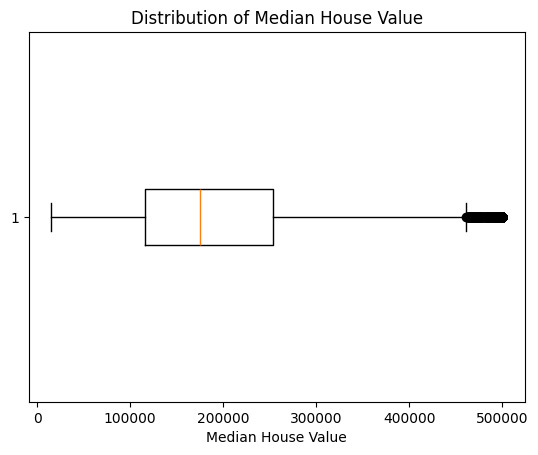

In [16]:
#outliers in median house value
plt.boxplot(df.median_house_value,vert=False)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.show()

In [17]:
#remove outliers in median_house_value
Q1=df.median_house_value.quantile(0.25)
Q3=df.median_house_value.quantile(0.75)
IQR=Q3-Q1
lower_bound=max(0,Q1-(1.5*IQR))
upper_bound=(Q3+(1.5*IQR))
print('lower bound =',lower_bound)
print('upper bound =',upper_bound)

lower bound = 0
upper bound = 461400.0


In [18]:
outliers=(df.median_house_value<=lower_bound)|(df.median_house_value>=upper_bound)
df=df[~outliers]

In [19]:
#remove outliers in households
Q1=df.households.quantile(0.25)
Q3=df.households.quantile(0.75)
IQR=Q3-Q1
lower_bound=max(0,Q1-(1.5*IQR))
upper_bound=(Q3+(1.5*IQR))
print('lower bound =',lower_bound)
print('upper bound =',upper_bound)

lower bound = 0
upper bound = 987.5


In [20]:
outliers=(df.households<=lower_bound)|(df.households>=upper_bound)
df=df[~outliers]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17374 entries, 2 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17374 non-null  float64
 1   latitude            17374 non-null  float64
 2   housing_median_age  17374 non-null  float64
 3   total_rooms         17374 non-null  float64
 4   total_bedrooms      17374 non-null  float64
 5   population          17374 non-null  float64
 6   households          17374 non-null  float64
 7   median_income       17374 non-null  float64
 8   median_house_value  17374 non-null  float64
 9   ocean_proximity     17374 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [22]:
#remove outliers in total_bedrooms
Q1=df.total_bedrooms.quantile(0.25)
Q3=df.total_bedrooms.quantile(0.75)
IQR=Q3-Q1
lower_bound=max(0,Q1-(1.5*IQR))
upper_bound=(Q3+(1.5*IQR))
print('lower bound =',lower_bound)
print('upper bound =',upper_bound)

lower bound = 0
upper bound = 1014.5


In [23]:
outliers=(df.total_bedrooms<=lower_bound)|(df.total_bedrooms>=upper_bound)
df=df[~outliers]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17148 entries, 2 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17148 non-null  float64
 1   latitude            17148 non-null  float64
 2   housing_median_age  17148 non-null  float64
 3   total_rooms         17148 non-null  float64
 4   total_bedrooms      17148 non-null  float64
 5   population          17148 non-null  float64
 6   households          17148 non-null  float64
 7   median_income       17148 non-null  float64
 8   median_house_value  17148 non-null  float64
 9   ocean_proximity     17148 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [25]:
#remove outliers in total_rooms
Q1=df.total_rooms.quantile(0.25)
Q3=df.total_rooms.quantile(0.75)
IQR=Q3-Q1
lower_bound=max(0,Q1-(1.5*IQR))
upper_bound=(Q3+(1.5*IQR))
print('lower bound =',lower_bound)
print('upper bound =',upper_bound)

lower bound = 0
upper bound = 4798.375


In [26]:
outliers=(df.total_rooms<=lower_bound)|(df.total_rooms>=upper_bound)
df=df[~outliers]

In [27]:
df.shape

(16793, 10)

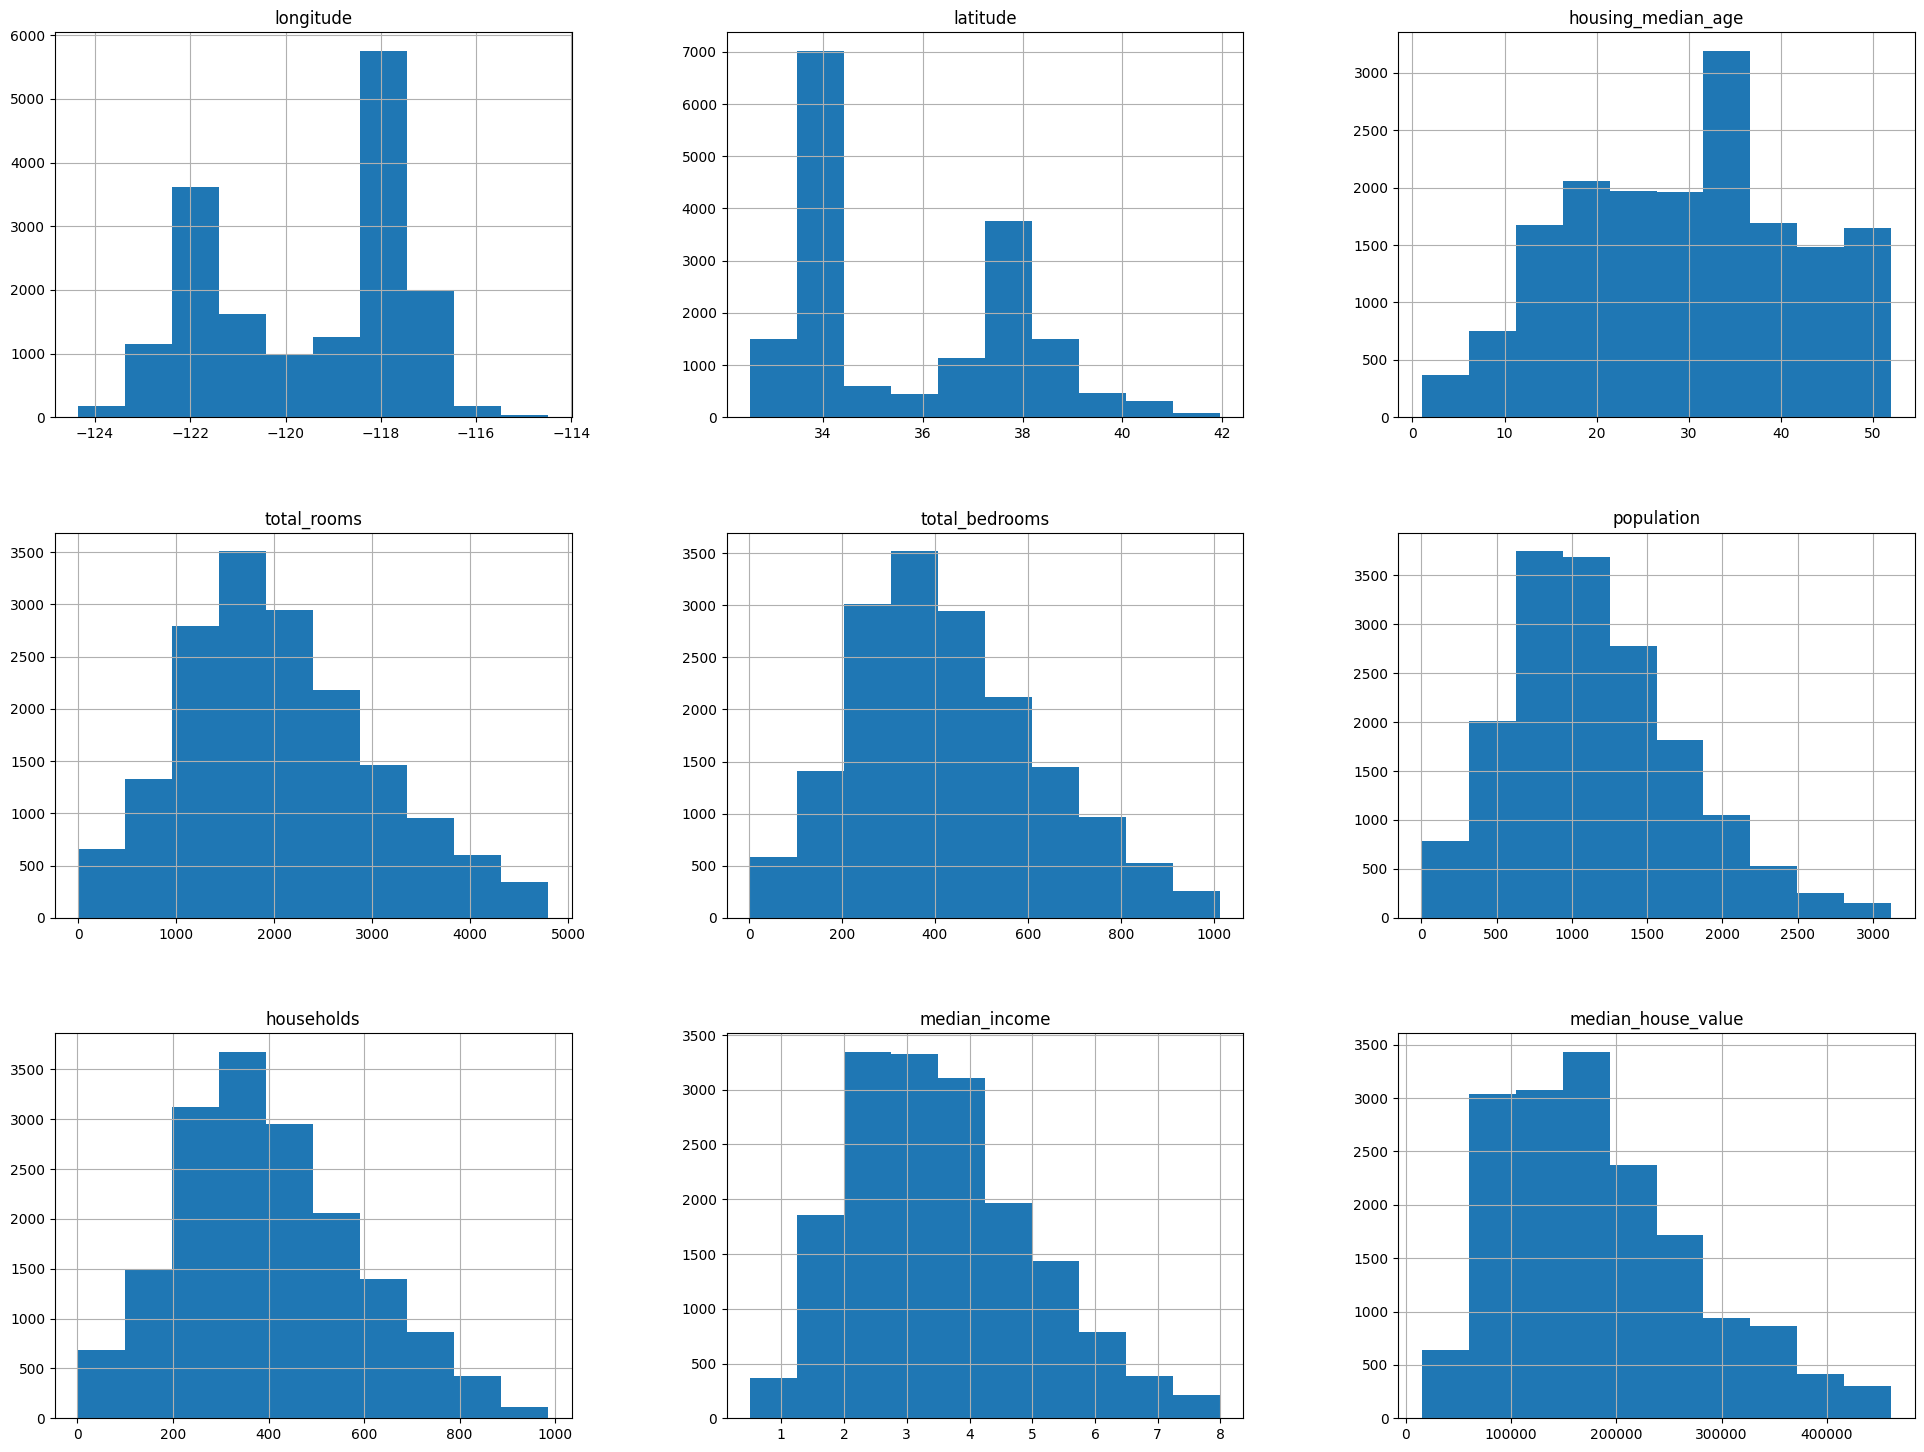

In [28]:
#check dataframe after removing outliers
df.hist(figsize=(24,18))
plt.show;

In [54]:
#location EDA
fig=px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    width=800,
    height=800,
    color='median_house_value',
    hover_data='median_house_value'
)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

In [34]:
#check for cardinality
print(df.ocean_proximity.unique())
print(df.ocean_proximity.nunique(),'in total')

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
5 in total


In [35]:
#check for leakage
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: >

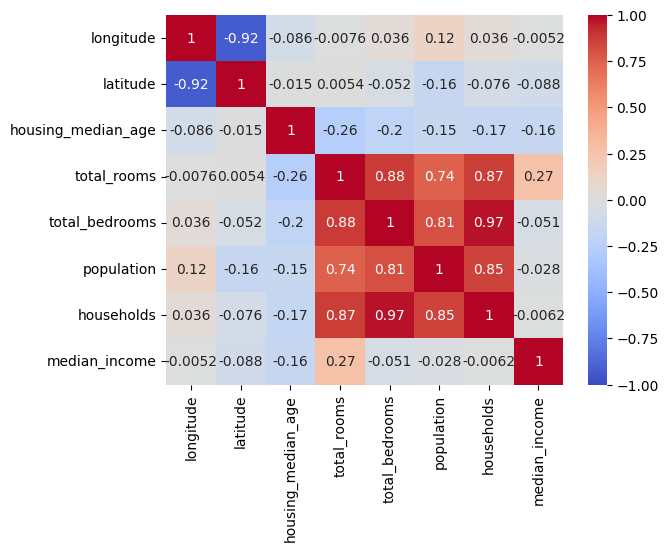

In [50]:
#check for multicollinearity
corr=df.drop(columns=['median_house_value','ocean_proximity']).corr()
sns.heatmap(corr,vmin=-1,cmap='coolwarm',annot=True)

In [51]:
data=df.drop(columns=['total_bedrooms','total_rooms','households'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16793 entries, 2 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16793 non-null  float64
 1   latitude            16793 non-null  float64
 2   housing_median_age  16793 non-null  float64
 3   population          16793 non-null  float64
 4   median_income       16793 non-null  float64
 5   median_house_value  16793 non-null  float64
 6   ocean_proximity     16793 non-null  object 
dtypes: float64(6), object(1)
memory usage: 1.5+ MB


<Axes: >

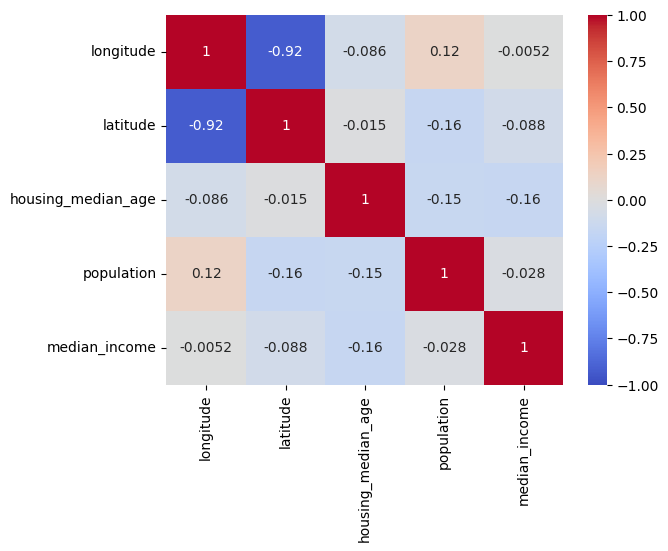

In [55]:
#check for multicollinearity
corr=data.drop(columns=['median_house_value','ocean_proximity']).corr()
sns.heatmap(corr,vmin=-1,cmap='coolwarm',annot=True)

In [62]:
#one hot encoding for categorical variables
data_final=pd.concat([data,(pd.get_dummies(data['ocean_proximity']))],axis=1).drop(columns='ocean_proximity')
data_final.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2,-122.24,37.85,52.0,496.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,558.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,565.0,3.8462,342200.0,False,False,False,True,False
5,-122.25,37.85,52.0,413.0,4.0368,269700.0,False,False,False,True,False
6,-122.25,37.84,52.0,1094.0,3.6591,299200.0,False,False,False,True,False


In [67]:
#specify features and target
features=['longitude', 'latitude', 'housing_median_age', 'population',
       'median_income', '<1H OCEAN', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN']
target='median_house_value'
X=data_final[features]
y=data_final[target]

In [68]:
#split into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [74]:
#Baseline Model
y_mean=y_train.mean()
y_pred_baseline=[y_mean]*len(y_test)
MAE_baseline=mean_absolute_error(y_test, y_pred_baseline)
print('The Mean Absolute Error=',MAE_baseline)

The Mean Absolute Error= 73969.33945410674


In [75]:
#Train Ridge Model
model = Ridge()
model.fit(X_train,y_train)

Ridge()

In [76]:
#Making predictions on the test set
y_pred=model.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
print('The Mean Absolute Error=',MAE)

The Mean Absolute Error= 45644.8663412148


In [97]:
#Deployment function

def predict(longitude, latitude, housing_median_age, population, median_income, Ocean_proximity):
    feature_columns = ["longitude", "latitude", "housing_median_age", "population", "median_income",
                       "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]

    ocean_proximity_mapping = {
        "<1H OCEAN": [1, 0, 0, 0, 0],
        "INLAND": [0, 1, 0, 0, 0],
        "ISLAND": [0, 0, 1, 0, 0],
        "NEAR BAY": [0, 0, 0, 1, 0],
        "NEAR OCEAN": [0, 0, 0, 0, 1]
    }

    row_data = [longitude, latitude, housing_median_age, population, median_income] + ocean_proximity_mapping.get(Ocean_proximity, [0, 0, 0, 0, 0])
    df = pd.DataFrame([row_data], columns=feature_columns)
    prediction = (model.predict(df))

    return round(prediction[0],2)


In [98]:
print(f'''The predicted value is {predict(-118.33,34.18,48,926.0,5.6975,'<1H OCEAN')}
The actual value is {y_test.iloc[10]}''')

The predicted value is 288250.86
The actual value is 231400.0
